# implement imdb example via notebook

In [13]:
% matplotlib inline

In [1]:
from __future__ import print_function
from examples import example_helper
import numpy as np
from keras.preprocessing import sequence
from keras.datasets import imdb
from deepmoji.model_def import deepmoji_architecture

Using TensorFlow backend.


In [2]:
# Seed for reproducibility
np.random.seed(1337)

nb_tokens = 20000
maxlen = 80
batch_size = 32

In [3]:
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=nb_tokens)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')


Loading data...


/Users/admin/.virtualenvs/keras_2_0/lib/python2.7/site-packages/keras/datasets/imdb.py:44: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


25000 train sequences
25000 test sequences


In [4]:
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad sequences (samples x time)
X_train shape: (25000, 80)
X_test shape: (25000, 80)


In [5]:
print('Build model...')
model = deepmoji_architecture(nb_classes=2, nb_tokens=nb_tokens, maxlen=maxlen)
model.summary()


Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80)                0         
_________________________________________________________________
embedding (Embedding)        (None, 80, 256)           5120000   
_________________________________________________________________
activation_1 (Activation)    (None, 80, 256)           0         
_________________________________________________________________
bi_lstm_0 (Bidirectional)    (None, 80, 1024)          3149824   
_________________________________________________________________
bi_lstm_1 (Bidirectional)    (None, 80, 1024)          6295552   
_________________________________________________________________
concatenate_1 (Concatenate)  (None, 80, 2304)          0         
_________________________________________________________________
attlayer (AttentionWeightedA (None, 2304)              2304  

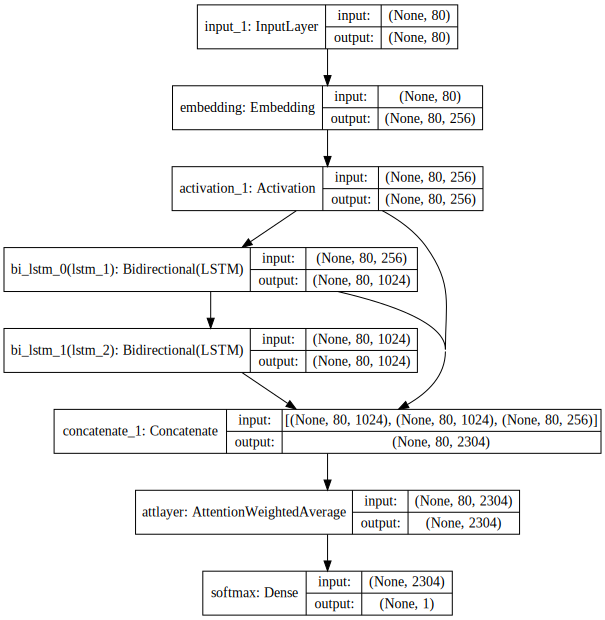

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
print('Train...')
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=1,
          validation_data=(X_test, y_test))

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 4090s - loss: 0.4574 - acc: 0.7872 - val_loss: 0.3873 - val_acc: 0.8356


In [22]:
print(history.history['acc'])

print(history.history['loss'])

[0.78720000000000001]
[0.45739857913017273]


In [24]:
history.history

{'acc': [0.78720000000000001],
 'loss': [0.45739857913017273],
 'val_acc': [0.83555999999999997],
 'val_loss': [0.38725190869331361]}

['acc', 'loss', 'val_acc', 'val_loss']


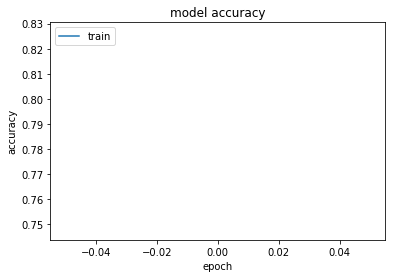

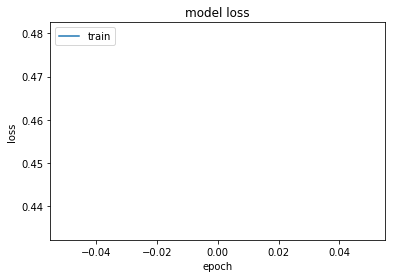

In [14]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 927s   
Test score: 0.387251908693
Test accuracy: 0.83556
